# Ford GoBike System Data Exploration

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In this section, the dataset is cleaned for tidiness and quality issues. 

In [364]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [365]:
# load in the dataset into a pandas dataframe
ford_go = pd.read_csv('fordgobike-tripdata.csv')

In [366]:
# high-level overview of data shape and composition
ford_go.shape

(183412, 16)

In [367]:
ford_go.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [368]:
ford_go.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [369]:
# Checking null values
ford_go.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [370]:
# Dropping columns with null values
column = ['start_station_id','start_station_name','end_station_id','end_station_name', 'member_birth_year','member_gender']
ford_go.dropna(subset=column, inplace= True)
print(ford_go.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [371]:
#Checking if there are any null values left
ford_go.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [372]:
# Changing the start date and end date to datetime objects instead of objects
ford_go['start_date'] = pd.to_datetime(ford_go['start_time']).dt.date
ford_go['start_time']= pd.to_datetime(ford_go['start_time']).dt.time
ford_go['end_date'] = pd.to_datetime(ford_go['end_time']).dt.date
ford_go['end_time'] = pd.to_datetime(ford_go['end_time']).dt.time



ford_go.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
start_date                  object
end_date                    object
dtype: object

In [373]:
# Changing end_date to pandas datetime format
ford_go['end_date'] = pd.to_datetime(ford_go['end_date'], format='%Y-%m-%d')

ford_go.end_date.dtypes

dtype('<M8[ns]')

In [374]:
#Obtaining the excert day of the week and month
ford_go['day']=ford_go['end_date'].dt.day_name()
ford_go['month']= ford_go['end_date'].dt.month_name()


ford_go.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,day,month
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01,Friday,March
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01,Friday,March
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,Friday,March
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,Friday,March
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,Friday,March


In [375]:
ordinal_var_dict = {'end_date': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict['end_date'])
ford_go['day'] = ford_go['day'].astype(ordered_var)


In [376]:
#Converting duration in seconds to hours 
ford_go['duration_minute'] = ford_go['duration_sec']/60
ford_go.duration_minute = ford_go.duration_minute.astype('int64')

ford_go.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,day,month,duration_minute
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01,Friday,March,869
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01,Friday,March,1030
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,Friday,March,608
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,Friday,March,26
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,Friday,March,29


In [377]:
# Getting Age as at when this data was obtained
ford_go['age'] = 2019 - ford_go['member_birth_year']

ford_go.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,day,month,duration_minute,age
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,2019-03-01,Friday,March,869,35.0
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,2019-03-01,Friday,March,1030,47.0
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,Friday,March,608,30.0
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,Friday,March,26,45.0
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,Friday,March,29,60.0


In [378]:
#Converting the age column to integer.
ford_go.age = ford_go.age.astype('int64')
ford_go.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,day,month,duration_minute,age
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,2019-03-01,Friday,March,869,35
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,2019-03-01,Friday,March,1030,47
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,Friday,March,608,30
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,Friday,March,26,45
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,Friday,March,29,60


In [379]:
col_list=['start_time','end_time','start_station_id','end_station_id','bike_id','duration_sec','member_birth_year','start_date','end_date']
ford_go.drop(col_list, axis=1, inplace=True)

ford_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_name       174952 non-null  object  
 1   start_station_latitude   174952 non-null  float64 
 2   start_station_longitude  174952 non-null  float64 
 3   end_station_name         174952 non-null  object  
 4   end_station_latitude     174952 non-null  float64 
 5   end_station_longitude    174952 non-null  float64 
 6   user_type                174952 non-null  object  
 7   member_gender            174952 non-null  object  
 8   bike_share_for_all_trip  174952 non-null  object  
 9   day                      174952 non-null  category
 10  month                    174952 non-null  object  
 11  duration_minute          174952 non-null  int64   
 12  age                      174952 non-null  int64   
dtypes: category(1), float64(4), int64(2), object

In [380]:
ford_go.head()

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,day,month,duration_minute,age
0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,Male,No,Friday,March,869,35
2,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,No,Friday,March,1030,47
3,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,Other,No,Friday,March,608,30
4,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,Male,Yes,Friday,March,26,45
5,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,Subscriber,Male,No,Friday,March,29,60


In [381]:
ford_go.describe()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,duration_minute,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,37.771220,-122.351760,37.771414,-122.351335,11.241461,34.196865
std,0.100391,0.117732,0.100295,0.117294,27.371269,10.118731
min,37.317298,-122.453704,37.317298,-122.453704,1.000000,18.000000
25%,37.770407,-122.411901,37.770407,-122.411647,5.000000,27.000000
50%,37.780760,-122.398279,37.781010,-122.397437,8.000000,32.000000
75%,37.797320,-122.283093,37.797673,-122.286533,13.000000,39.000000
max,37.880222,-121.874119,37.880222,-121.874119,1409.000000,141.000000


### What is the structure of your dataset?

There are 183412 ford gobike entries originally in the dataset with 16 features. After preliminary wrangling, the entries were reduced to 174952 while the features to 12. 

### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out what features are best for predicting the days and month with the most rides, the age group and gender with the highest ride, and average duration of rides.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will help support my investigation are:

* The day and month
* Duration
* Age
* Gender


## Univariate Exploration

In this section, the investigation of each features is conducted. 

### 1) Visualizing the age distribution

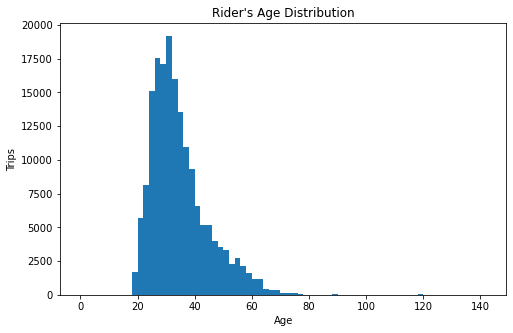

In [382]:
# Creating a histogram of the age column
plt.figure(figsize=[8, 5])
bins = np.arange(0, ford_go['age'].max()+2, 2)
plt.hist(data = ford_go, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('Trips')
plt.title("Rider's Age Distribution");

Discussion: From the above graph, it can be observed that the age distribution is skewed to the right, that is, positively skewed. This indicate that the mean of the ages is greater than the median and mode. 

### 2) Plot showing the age group with the highest trips

In [383]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 141] 
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-141']
ford_go['age'] = pd.cut(ford_go['age'], bins, labels=labels)
ford_go.sort_values(['day', 'age'])
ford_go.head()

,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,day,month,duration_minute,age
0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,Male,No,Friday,March,869,30-39
2,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,No,Friday,March,1030,40-49
3,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,Other,No,Friday,March,608,20-29
4,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,Male,Yes,Friday,March,26,40-49
5,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,Subscriber,Male,No,Friday,March,29,50-59


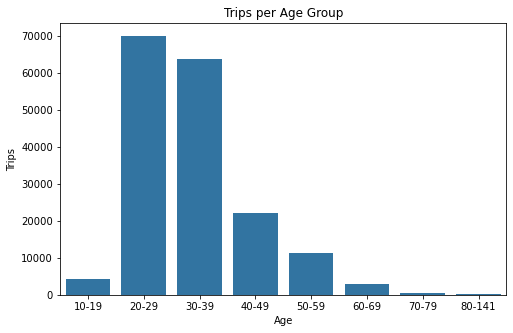

In [384]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = ford_go, x = 'age', color = base_color)
plt.xlabel('Age')
plt.ylabel('Trips')
plt.title("Trips per Age Group");

Discussion: This graph shows that most trips were performed by users within the age group of 20-29 and 30-39. However, users within the age group of 70-79 and 80-141 rarely performed any trip.  

### 3) Visualizing the gender distribution

In [385]:
# a function for bar graphs
def bar_chart(col_name, title,x,y):
    plt.figure(figsize=[8, 5])
    base_color= sb.color_palette()[0]
    #freq= ford_go[col_name].value_counts().index
    sb.countplot(data= ford_go, x=col_name, color= base_color);

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

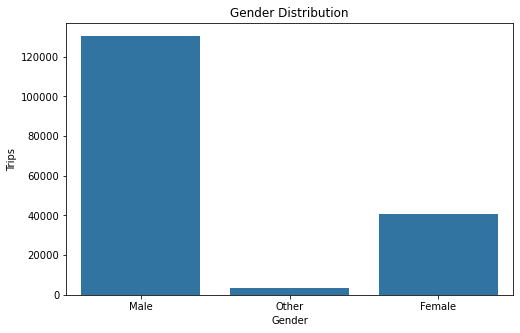

In [386]:
bar_chart('member_gender',"Gender Distribution","Gender",'Trips')

Discussion: This graph dipicts that most trips were performed by male users. Additionally, a couple of the users did not indicate whether they were either male or females. 

### 4) Distribution of days with the highest trips

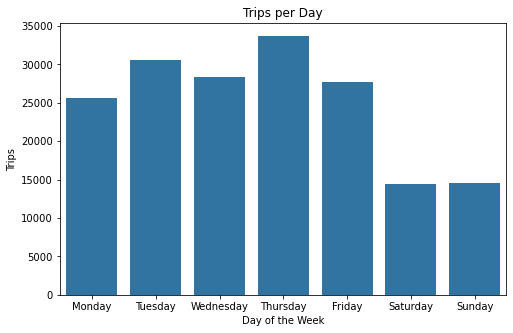

In [387]:
bar_chart('day',"Trips per Day","Day of the Week",'Trips')

Discussion: This graph shows that most trips were performed on thursday, followed by tuesday. Additionally, the numbers of trips performed on saturday and sunday were almost thesame. 

### 5) Distribution for bike share for all trip

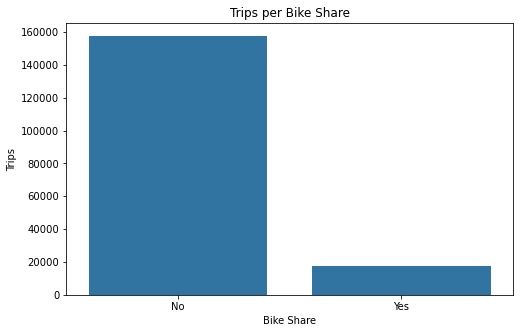

In [388]:
bar_chart('bike_share_for_all_trip',"Trips per Bike Share","Bike Share",'Trips')

DIscussion: This graph shows that bikes were not shared for a significant number of the trips. 

### 6) Distribution for trips per months

In [389]:
ValueCount = ford_go['month'].value_counts()
ValueCount

February    174938
March           14
Name: month, dtype: int64

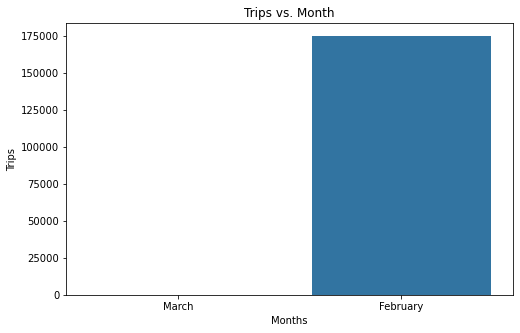

In [390]:
bar_chart('month',"Trips vs. Month","Months",'Trips')

Discussion: This graph dipicts that almost all the trips were performed in the month of february. However, 14 trips were performed in the month of march, but they are insignificant. 

### 7) Bar chart showing the duration of trips

In [391]:
ford_go.duration_minute.describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_minute, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_12496\4153440606.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


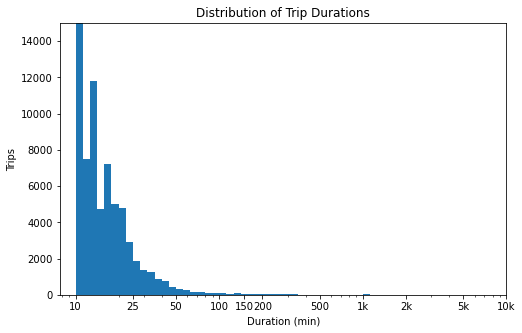

In [392]:
log_binsize = 0.05
log_bins = 10 ** np.arange(1, np.log10(ford_go['duration_minute'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_go, x = 'duration_minute', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Trips')
plt.xscale('log')
plt.xticks([10,25,50,100,150,200,500, 1e3, 2e3, 5e3, 1e4], [10,25,50,100,150,200,500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

Discussion: It can be observed from the log plot that the duration of most trips was between 10 and 15 min. Additionally, at some point, as the duration increase the number of trips decreases. 

### 8) Distribution of the riders type

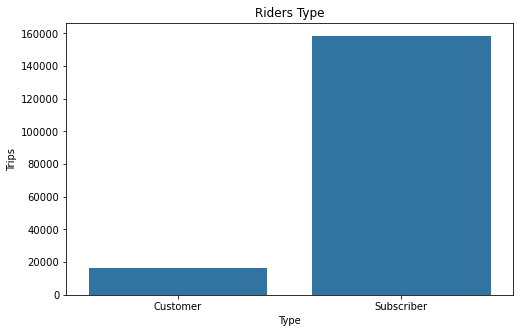

In [393]:
bar_chart('user_type',"Riders Type", 'Type','Trips')

Discussion: It can be observed from the graph that a significant number of the users were subscribers, while a few of them were customers. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

An uncommon value of 141 years was observed as an age outlier in the age column. In order to obtain a more distinct representation of the distribution of duration, I had to carry out a logarithmic conversion.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To determine which day of the week had the highest number of rides, I added a new column named "day". To achieve this, I had to extract the date and time from the initial start_time and end_time columns.

## Bivariate Exploration


### 9) Visualing the users' gender based on age group

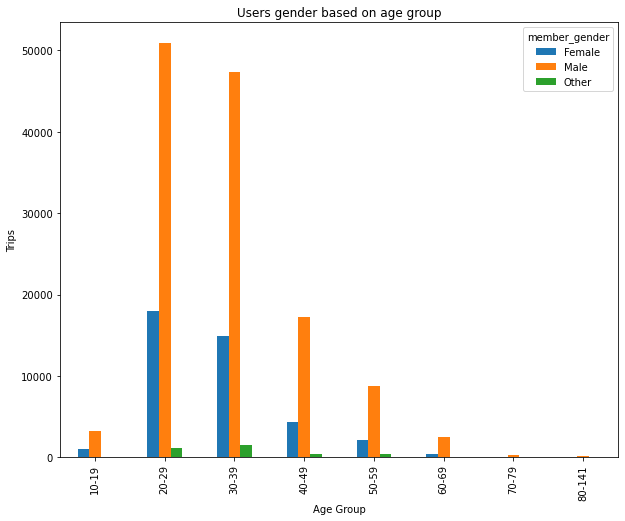

In [394]:
ford_go.groupby(['age'])['member_gender'].count()
ford_go.groupby('age')['member_gender'].value_counts().unstack().plot(kind='bar',figsize=(10,8))
plt.title('Users gender based on age group')
plt.xlabel('Age Group')
plt.ylabel('Trips');
plt.show()

### 10) Determining the relationship between the gender and the age group

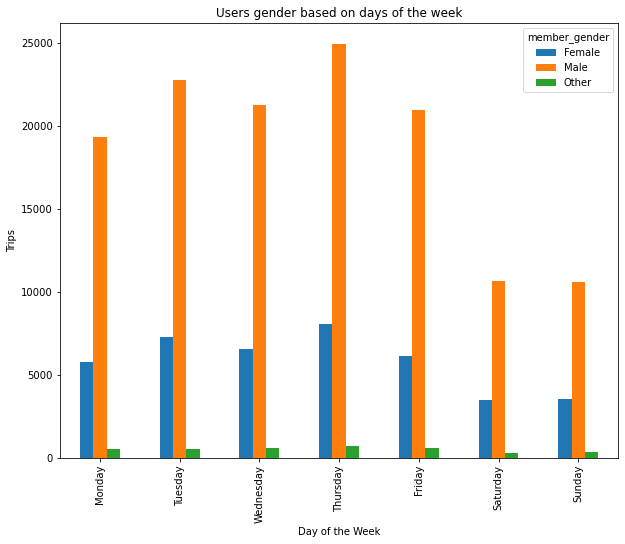

In [395]:
ford_go.groupby(['day'])['member_gender'].count()
ford_go.groupby('day')['member_gender'].value_counts().unstack().plot(kind='bar',figsize=(10,8))
plt.title('Users gender based on days of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Trips');
plt.show()



### 11) Relationship between gender and user type 

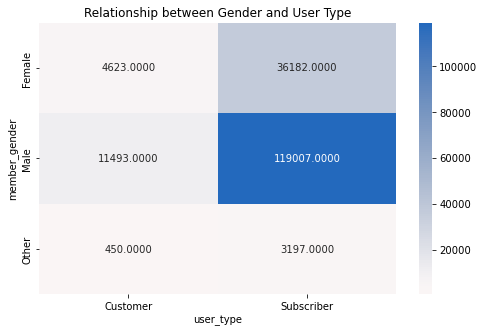

In [396]:
# A heat map of gender and user type
plt.figure(figsize=[8,5])
counts= ford_go.groupby(['member_gender', 'user_type']).size()
counts= counts.reset_index(name= 'count')
counts=counts.pivot(index='member_gender', columns='user_type', values= 'count');
sb.heatmap(counts, annot= True, fmt='.4f', cmap = 'vlag_r', center = 0)

plt.title('Relationship between Gender and User Type');



### 12) Relationship between age group and trip days of the week 

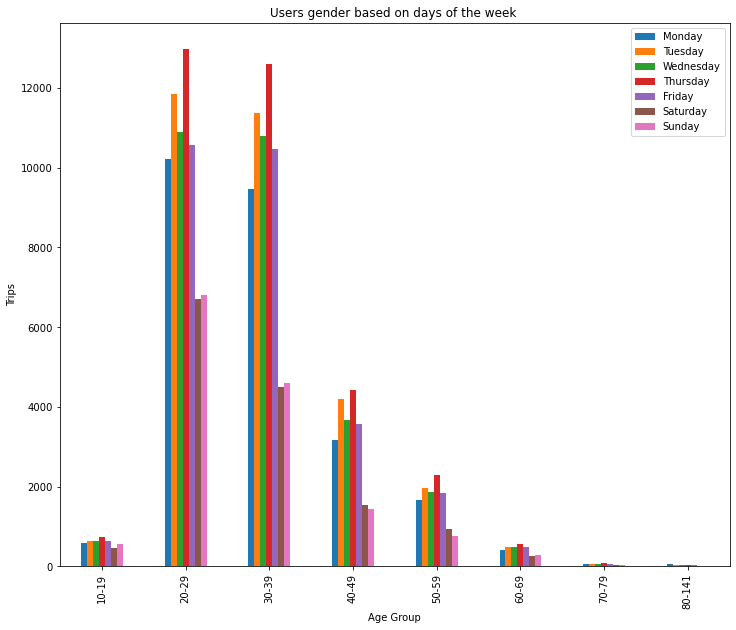

In [397]:
ford_go.groupby(['age'])['day'].count()
ford_go.groupby('age')['day'].value_counts().unstack().plot(kind='bar',figsize=(12,10))
plt.title('Users gender based on days of the week ')
plt.xlabel('Age Group')
plt.ylabel('Trips');
plt.show()

### 13) Relationship between age group and user type 

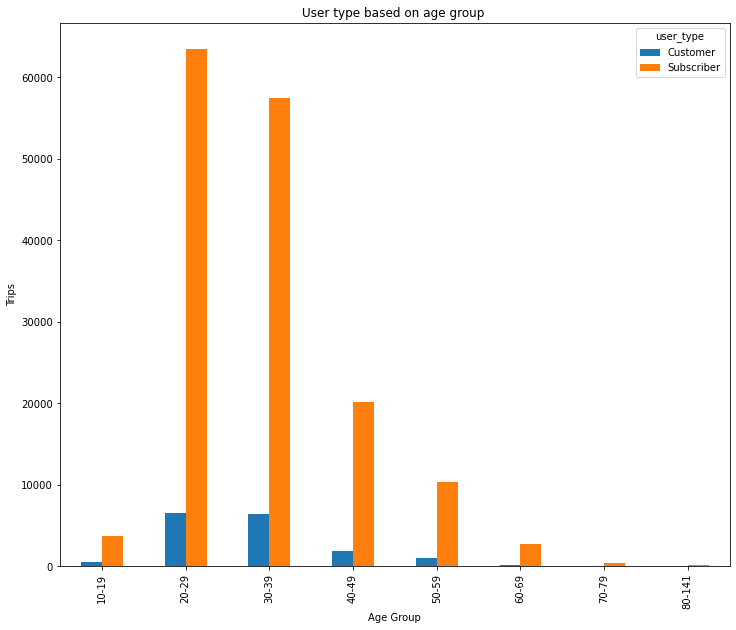

In [398]:
ford_go.groupby(['age'])['user_type'].count()
ford_go.groupby('age')['user_type'].value_counts().unstack().plot(kind='bar',figsize=(12,10))
plt.title('User type based on age group ')
plt.xlabel('Age Group')
plt.ylabel('Trips');
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
From this plots above the following points were observed:
* Most of the trips were performed by the male gender and they are between the age group of 20-29 and 30-39.
* Only the male gender between the age group 70-79 and 80-141 participated in the trip.
* The age group between 20-29 and 30-39 had the highest trip duration.
* Most of the subscribers were male and they were between the age group of 20-29 and 30-39.
* Most of the trips were performed by the age group 20-29 and 30-39. Additionally, they were performed on thursday and tuesday.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It was discovered that the number of female subscribers were three times more than male customers.

## Multivariate Exploration

### 14) Relationship between age group, gender, trip duration

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


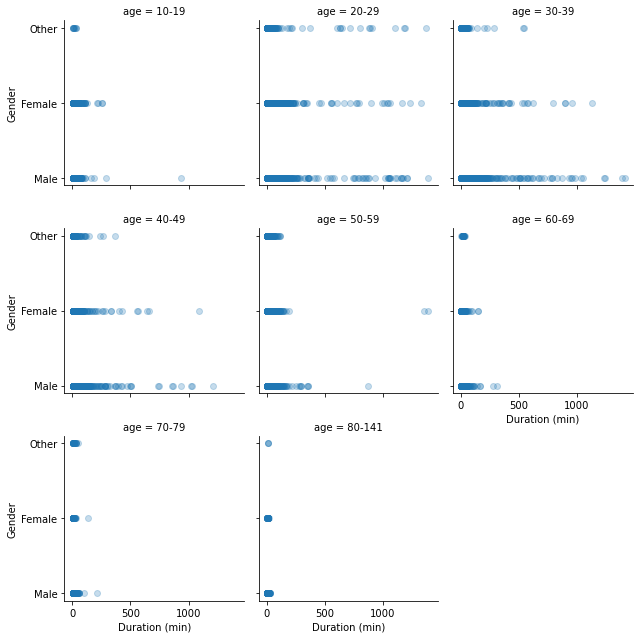

In [399]:
# create faceted scatter plot on levels of gender
g = sb.FacetGrid(data = ford_go, col = 'age', col_wrap = 3, size = 3)
g.map(plt.scatter,  'duration_minute','member_gender', alpha=0.25)
g.set_xlabels('Duration (min)')
g.set_ylabels('Gender')

plt.show();

### 15) Relationship between age group, duration, user_type

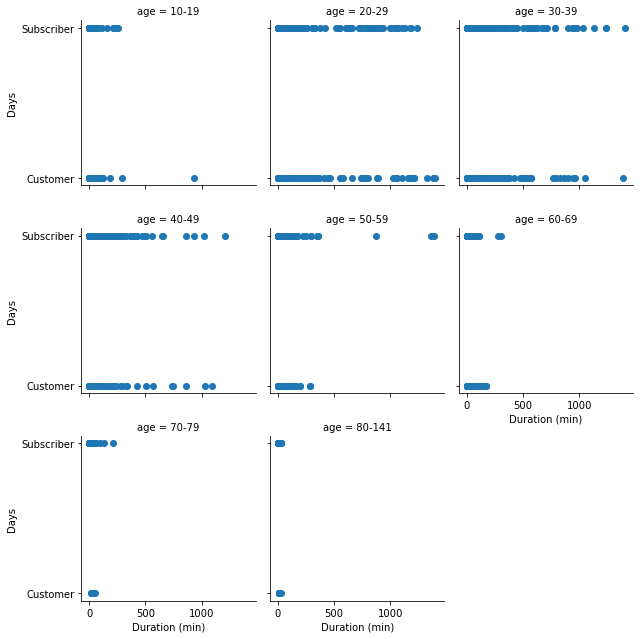

In [403]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = ford_go, col = 'age', col_wrap = 3, height = 3)
g.map(plt.scatter, 'duration_minute', 'user_type')
g.set_xlabels('Duration (min)')
g.set_ylabels('Days')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It can be observed that the age group between 20-29 and 30-39 had the highest trip for both male and female. However, the age group between 20-29 had the highest trip for users who did not indicate their gender. The age group between 20-29 and 30-39 also had the highest trip duration with user type majorly subscribers. 


## Conclusion 

It can be concluded that:
* Most of the users that participated in the trip were male.
* Thursday and tuesday were the days with the highest trips while saturday and sunday had almost the same number of trips. 
* The age group between 20-29 and 30-39 were the most participant in the trip.
* Majority of the riders are subscribers

## Limitations 

Most of the features provided in the dataset were unnecessary. 